In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# CSV 파일이 저장된 폴더 경로
folder_path = '//content/drive/MyDrive/DB프로젝트/data_csv'

# # 트랜스포즈할 파일 이름
# file_name = 'result_SalesPower_2022.csv'
# file_path = os.path.join(folder_path, file_name)
# file_data = pd.read_csv(file_path)
# file_data.set_index(file_data.columns[0], inplace=True)
# file_data = file_data.T
# file_data.to_csv(file_path)

columns_to_read = ['계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

# 해당 폴더 내의 모든 CSV 파일 목록
file_list = [f for f in os.listdir(folder_path) if f.startswith('result_SalesPower') and f.endswith('.csv')]

# 첫 번째 행의 데이터를 저장할 빈 데이터프레임 생성
first_row_data = pd.DataFrame()

# 각 파일의 첫 번째 행의 데이터를 읽어와서 빈 데이터프레임에 추가
for file in file_list:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, usecols=columns_to_read, nrows=1)  # 첫 번째 행만 읽기
    first_row_data = pd.concat([first_row_data, data])

# 인덱스를 '2012'부터 '2022'까지 변경
first_row_data.index = [str(year) for year in range(2012, 2023)]

first_row_data.columns = ['total', 'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju']

# 데이터프레임 출력
print(first_row_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          total     Seoul     Busan     Daegu   Incheon  Gwangju   Daejeon  \
2012  477591701  45018862  19980898  14858786  22578048  8197276   9102524   
2013  474848580  46555105  20364705  15080052  22673441  8274074   9225140   
2014  483654816  45381484  20002307  14947708  23211766  8333873   9182737   
2015  466592949  47234102  20664842  14954958  22651946  8130493   9160107   
2016  497038904  46493234  20467093  15268114  23875857  8558369   9379633   
2017  547932742  47295807  21067833  15443949  24901194  8973447   9748621   
2018  533430811  45787926  20503969  14758568  23638583  8531108   9405221   
2019  520498738  47810210  21216605  15675749  24921926  8773811   9648827   
2020  509269715  47167205  20802410  15265584  24280690  8603297   9415699   
2021  507746386  46298158  21007358  15386372  24515313  8683649   9423804   
2022  5479327

# **지역별 에너지 판매량**

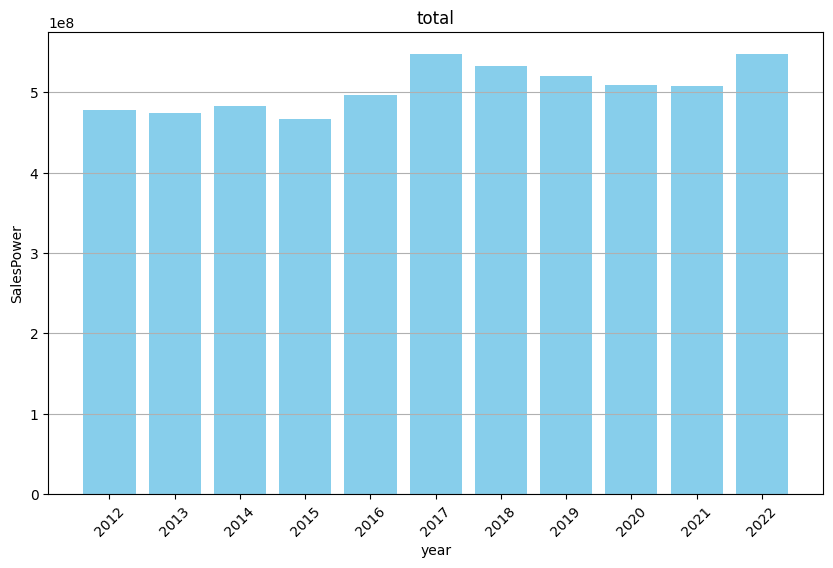

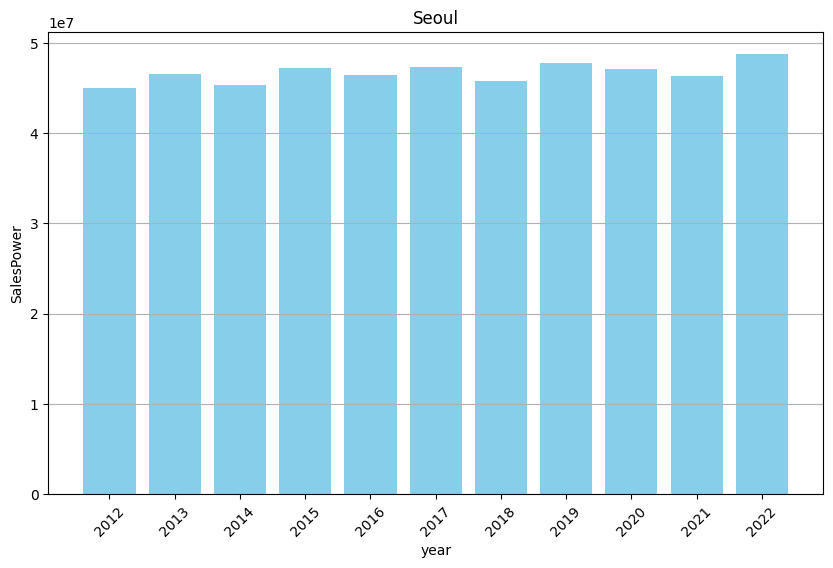

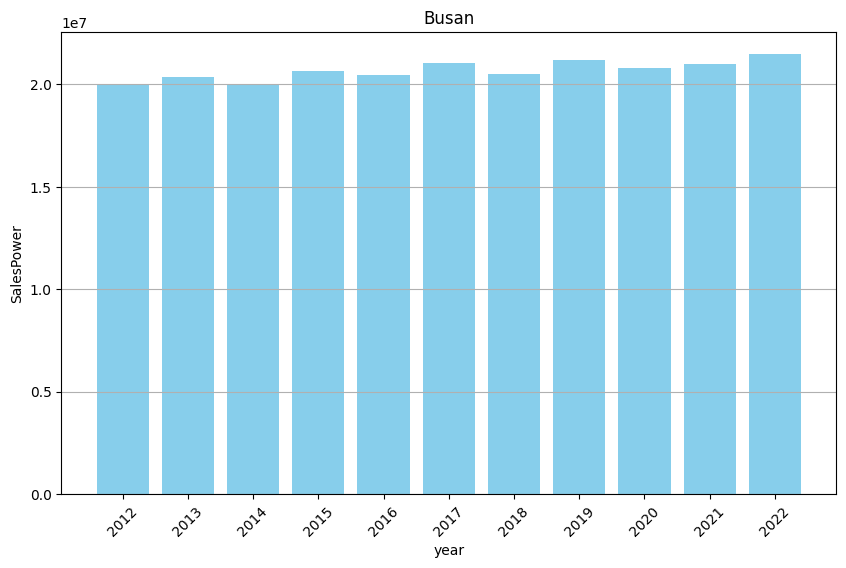

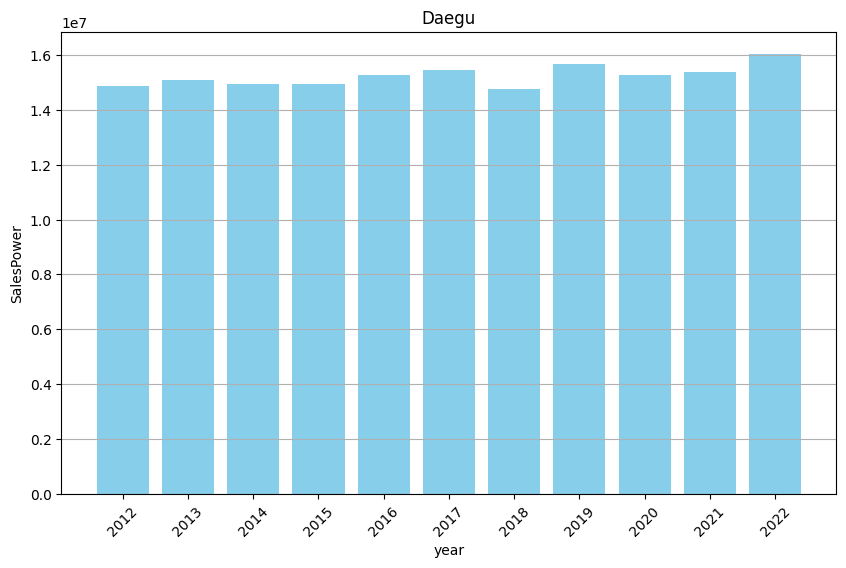

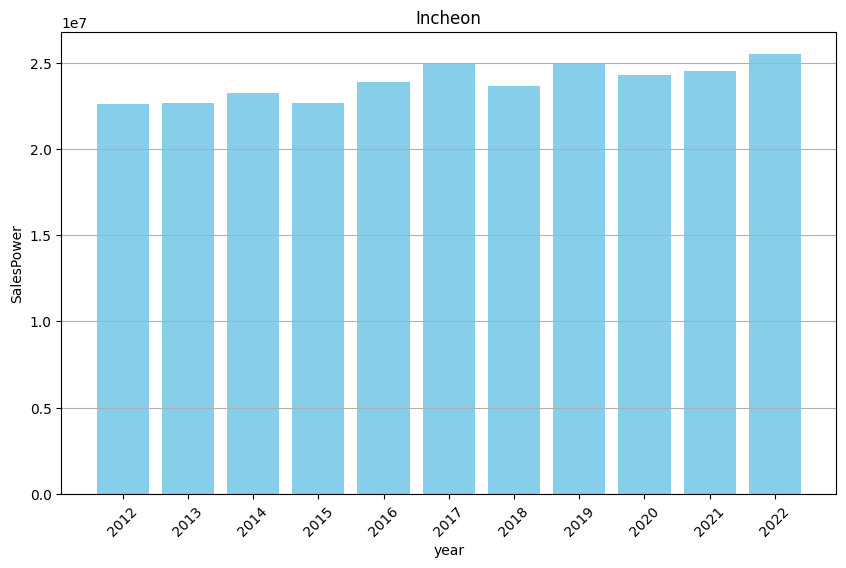

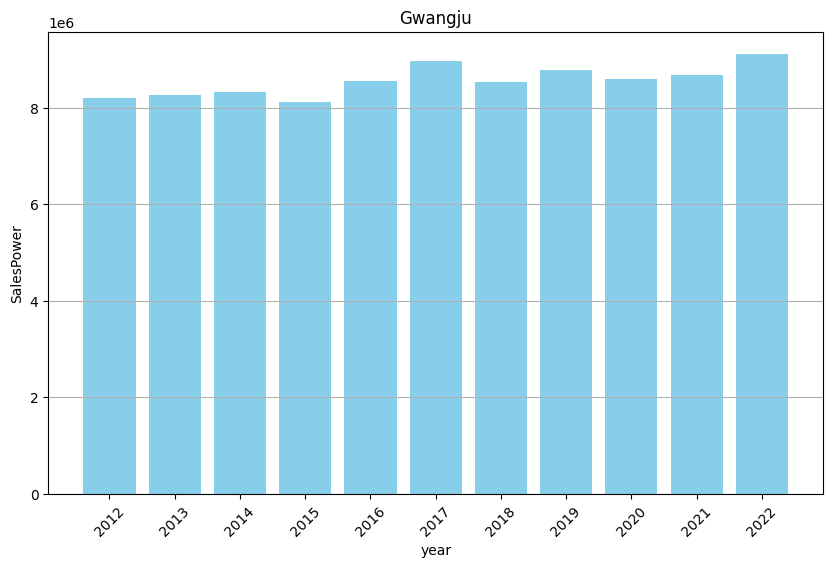

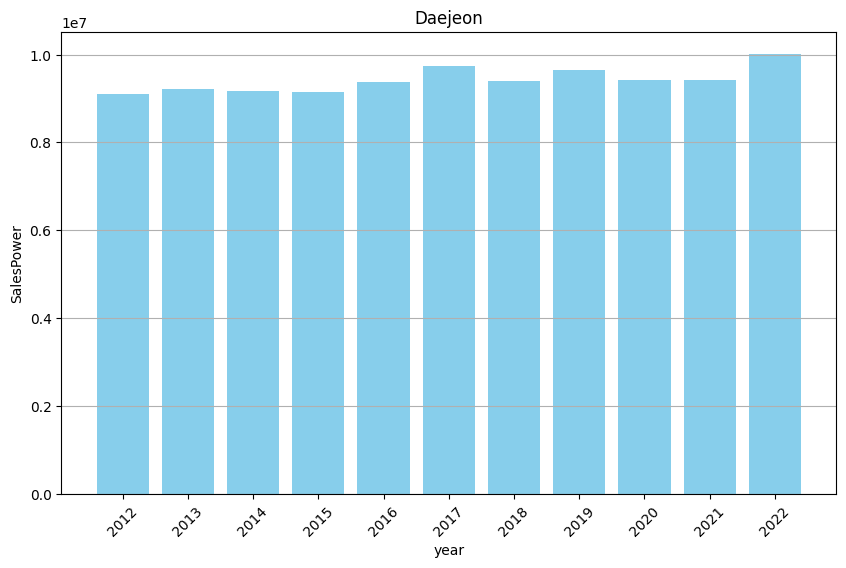

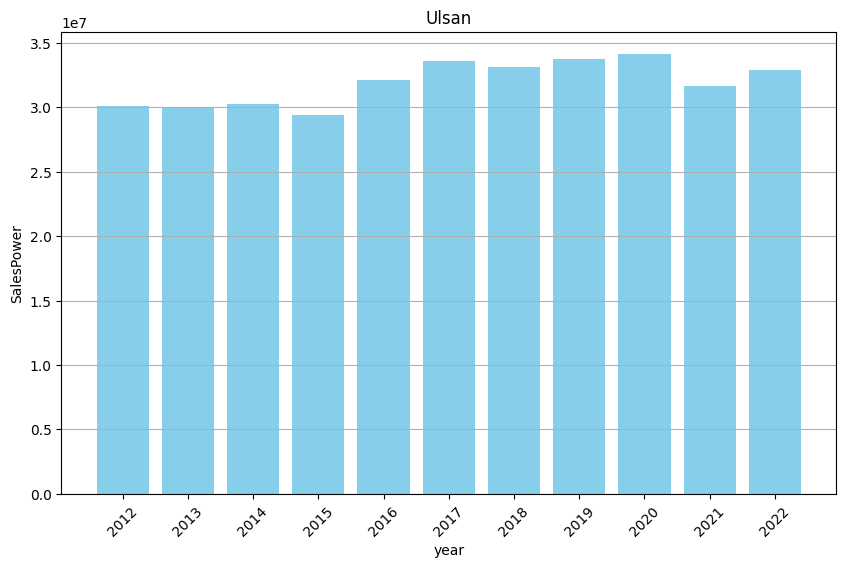

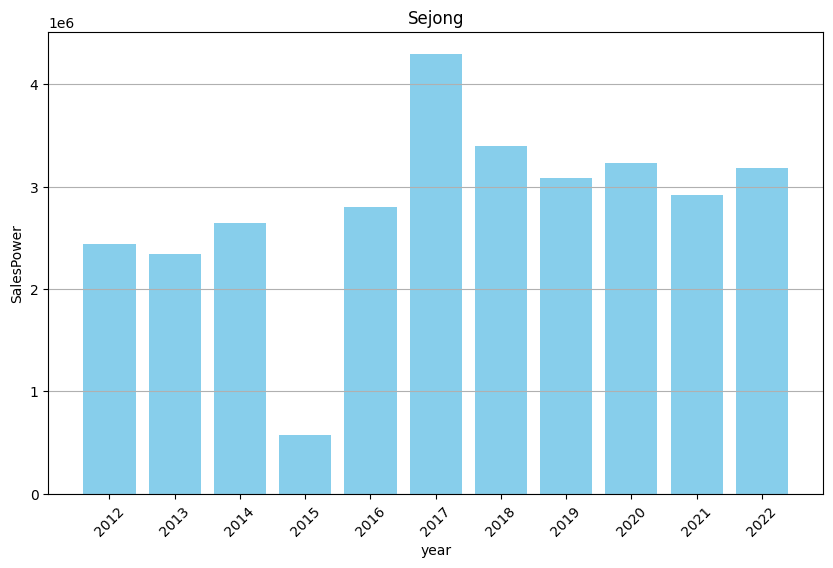

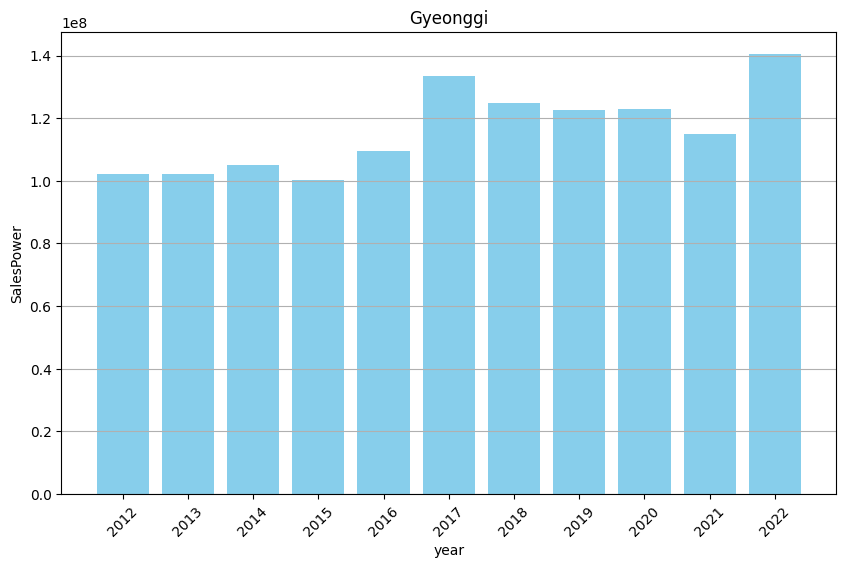

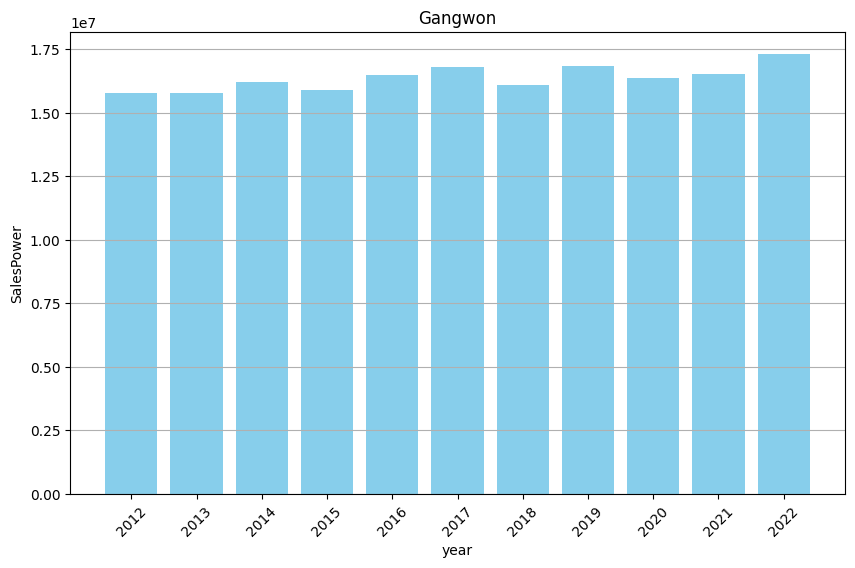

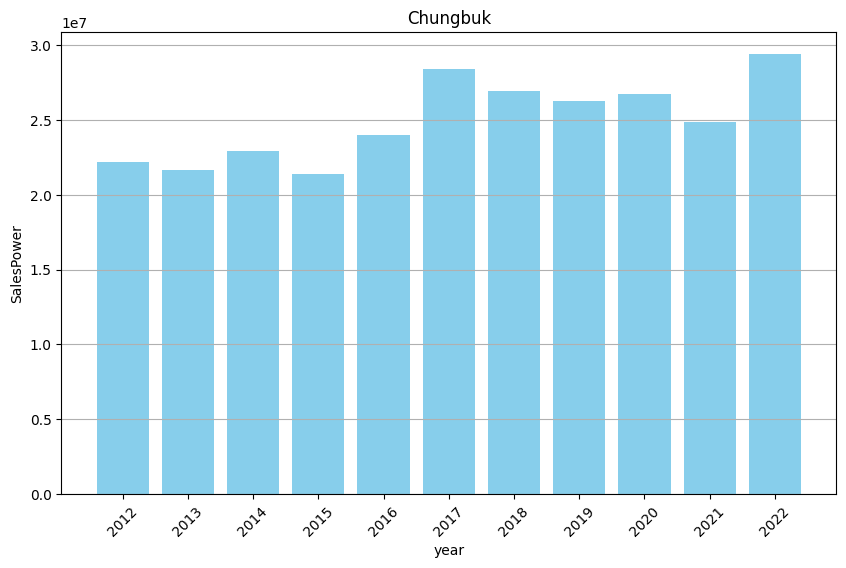

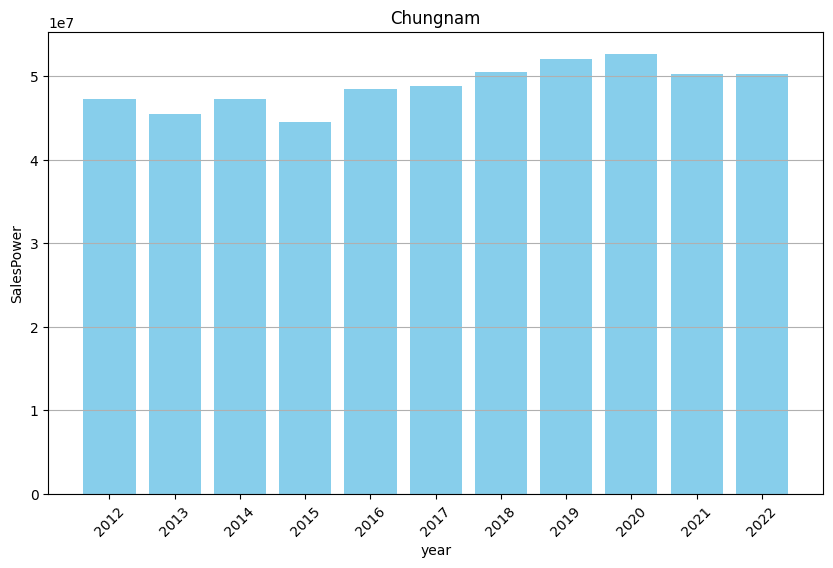

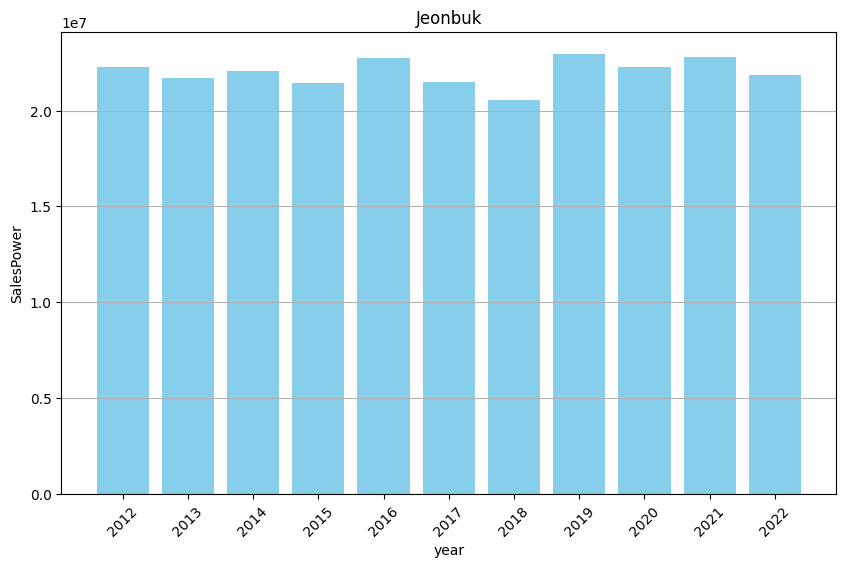

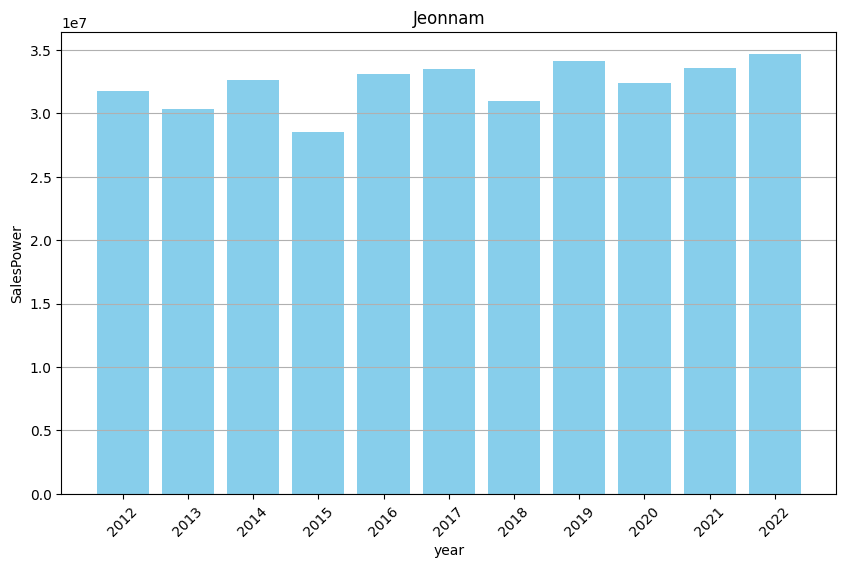

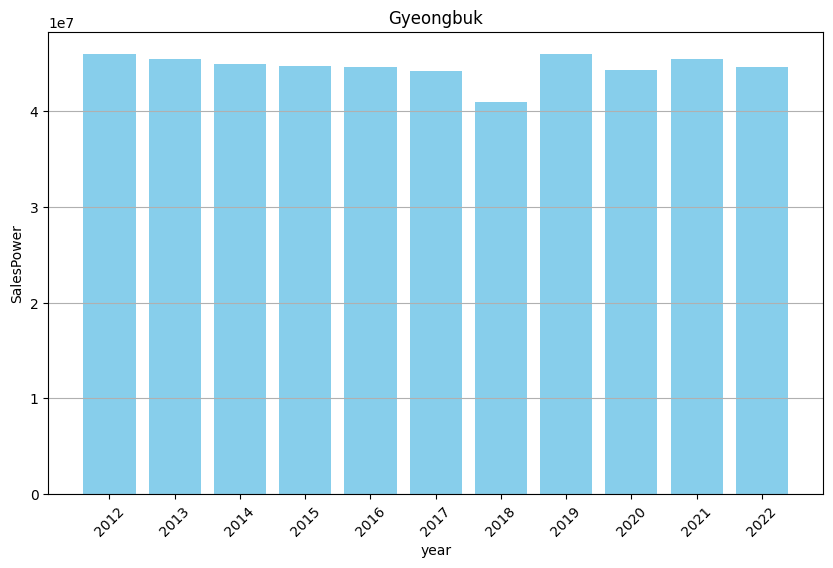

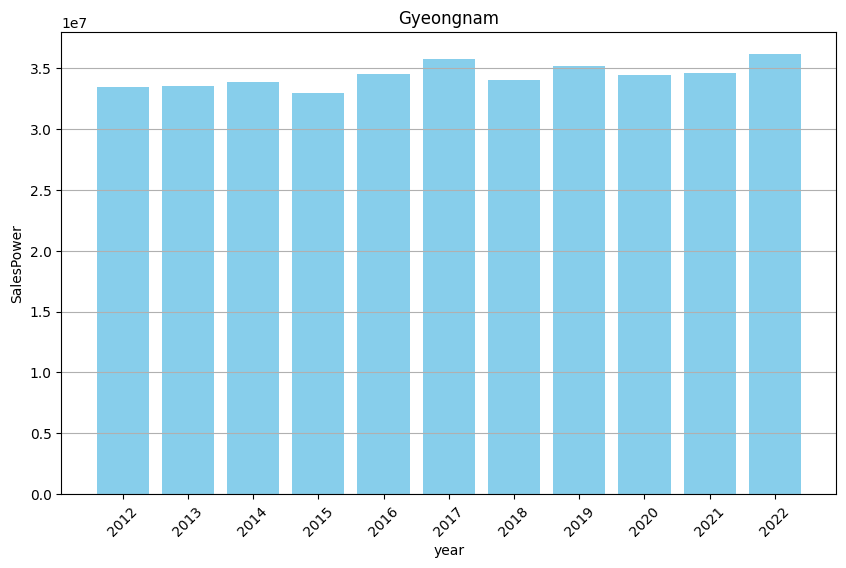

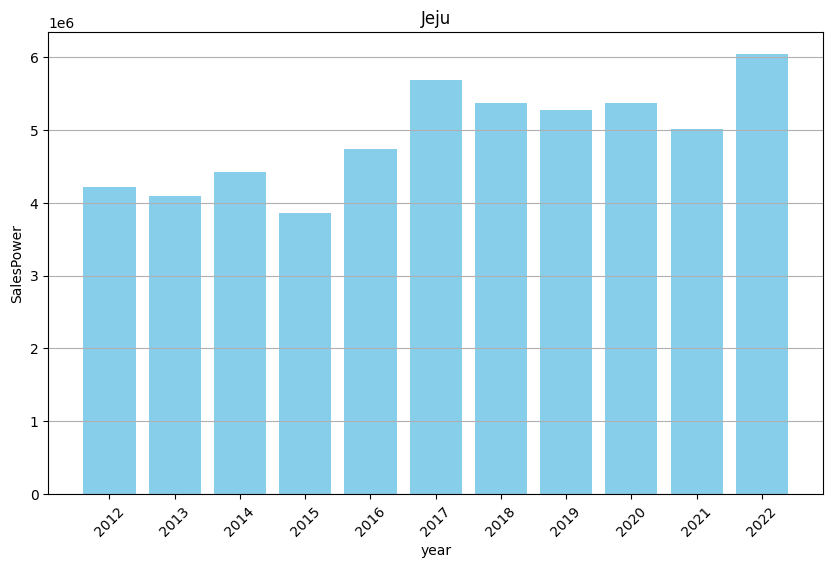

In [87]:
for column in first_row_data.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(first_row_data.index, first_row_data[column], color='skyblue')
    plt.title(column)
    plt.xlabel('year')
    plt.ylabel('SalesPower')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#**꺾은선 그래프**

전부

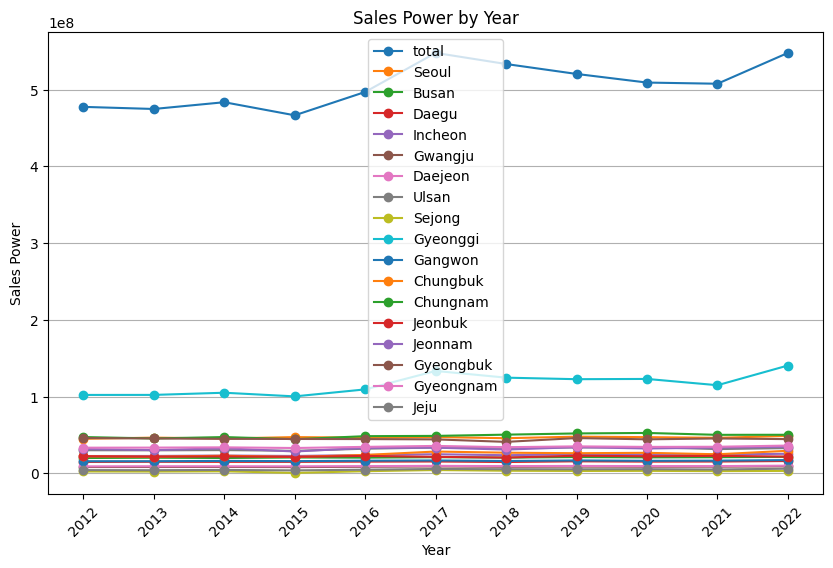

In [85]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=[])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.title('Sales Power by Year')
plt.xlabel('Year')
plt.ylabel('Sales Power')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()

total 제외

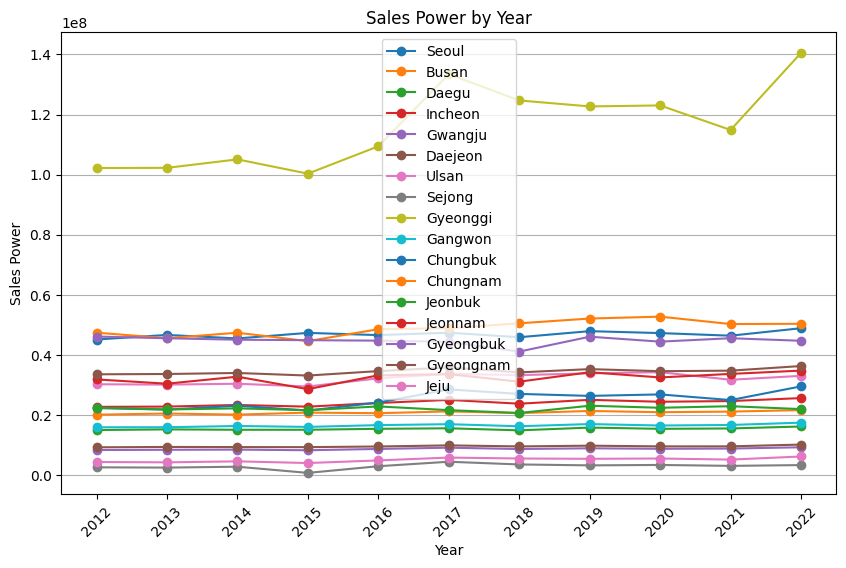

In [84]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=['total'])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.title('Sales Power by Year')
plt.xlabel('Year')
plt.ylabel('Sales Power')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()

total, Gyeonggi 제외

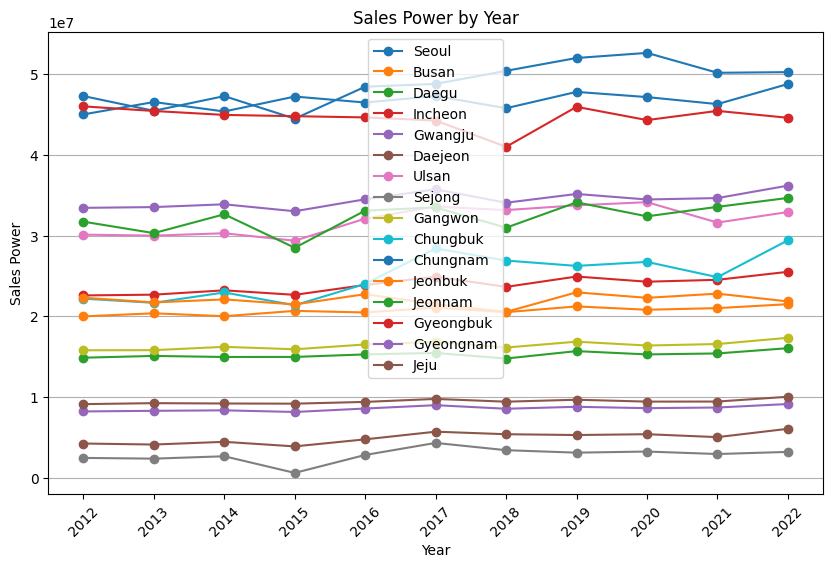

In [83]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=['total', 'Gyeonggi'])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.title('Sales Power by Year')
plt.xlabel('Year')
plt.ylabel('Sales Power')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()